# **Importing Necessary Libraries**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [100]:
#ccdf=Credit Card Fraud Detection
ccdf = pd.read_csv('CreditCardDataset.csv')

In [101]:
ccdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


# **EDA**

In [102]:
print(ccdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [103]:
ccdf.shape

(57355, 31)

In [104]:
ccdf.describe

<bound method NDFrame.describe of          Time        V1        V2        V3        V4        V5        V6  \
0           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
1           2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
2           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
3          11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
4          12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
...       ...       ...       ...       ...       ...       ...       ...   
57350  172751  2.085387 -0.033624 -1.706889 -0.015100  0.644669 -0.245303   
57351  172760 -6.713826  2.369104 -3.534768 -0.368259 -1.721030 -1.322808   
57352  172768 -2.076175  2.142238 -2.522704 -1.888063  1.982785  3.732950   
57353  172770  2.007418 -0.280235 -0.208113  0.335261 -0.715798 -0.751373   
57354  172777 -1.266580 -0.400461  0.956221 -0.723919  1.531993 -1.788600   

             V7        V8        V9  ... 

In [105]:
ccdf.isnull().values.any()


False

In [106]:
ccdf['Class'].value_counts()

0    56863
1      492
Name: Class, dtype: int64

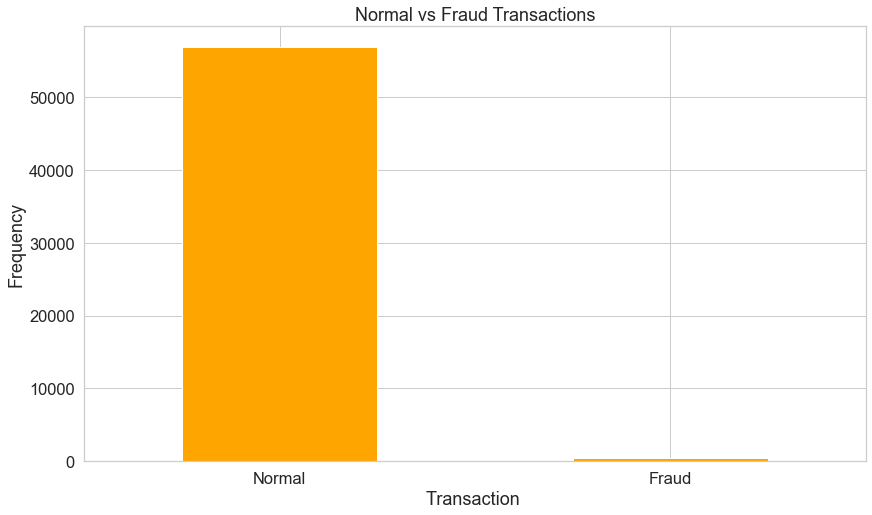

In [107]:
count_classes = pd.value_counts(ccdf['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="orange")
plt.title("Normal vs Fraud Transactions")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction ")
plt.ylabel("Frequency");

In [108]:
# Determine number of fraud cases in dataset

fraud = ccdf[ccdf['Class'] == 1]
valid = ccdf[ccdf['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(ccdf[ccdf['Class'] == 1])))
print('Valid Transactions: {}'.format(len(ccdf[ccdf['Class'] == 0])))


0.008652375006594798
Fraud Cases: 492
Valid Transactions: 56863


C:\Users\aksha\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

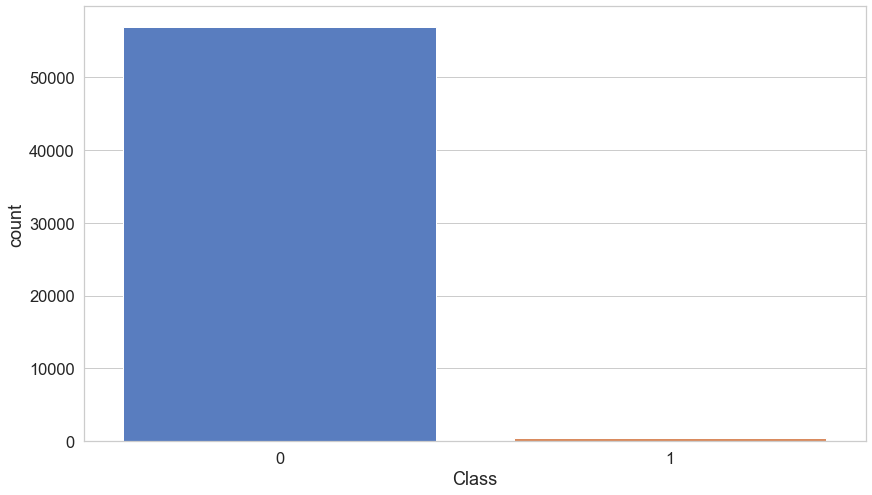

In [109]:
#Checking Distribution Class
sns.countplot(ccdf['Class'])

### **The data is highly imbalanced, so we need to balance it !**

C:\Users\aksha\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

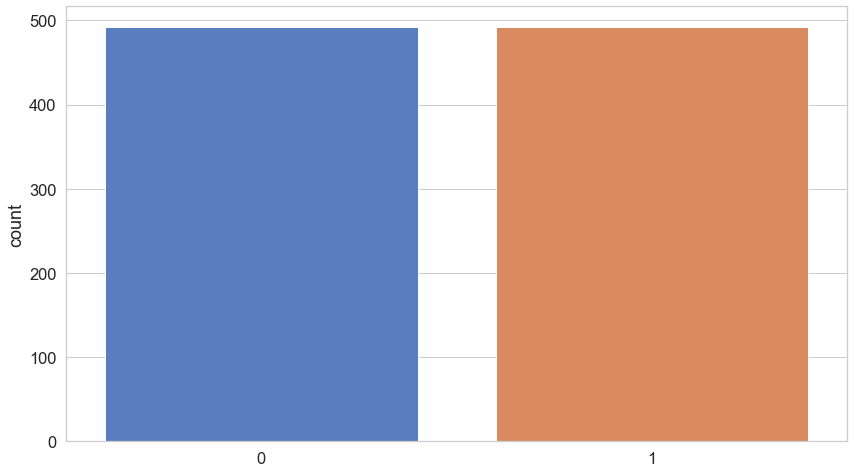

In [110]:
from imblearn.under_sampling import RandomUnderSampler

X = ccdf.iloc[:, :-1].values
y = ccdf.iloc[:, -1].values

undersample = RandomUnderSampler(sampling_strategy='majority')
X_balanced, y_balanced = undersample.fit_resample(X, y)

sns.countplot(y_balanced)


In [119]:
# Split the dataset into features and target
X = ccdf.drop(['Class'], axis=1)
y = ccdf['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

# Convert the data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.to_numpy())
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.to_numpy())


# **Implementing Neural Network using PyTorch Framework**

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in testing set: {len(X_test)}")


Number of samples in training set: 787
Number of samples in testing set: 197


In [112]:
import torch

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)


In [113]:
import torch.nn as nn
import torch.nn.functional as F

class FraudDetectionNet(nn.Module):
    def __init__(self):
        super(FraudDetectionNet, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = FraudDetectionNet()
print(model)


FraudDetectionNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [120]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### **Training loss and Validation loss**

In [122]:
import torch.optim as optim

model = FraudDetectionNet()  # create an instance class
criterion = nn.BCELoss()  # binary cross-entropy loss function
optimizer = optim.Adam(model.parameters())  #  Adam optimizer to train data

train_losses = []  # Storing the training losses
val_losses = []  # initialize an empty list to store the validation losses

for epoch in range(100):  # loop over 100 epochs
    train_loss = 0.0  
    val_loss = 0.0  
    model.train()  

    optimizer.zero_grad()  
    outputs = model(X_train)  
    loss = criterion(outputs, y_train.view(-1, 1)) 
    loss.backward()  
    optimizer.step()  

    model.eval()  #evaluation mode
    with torch.no_grad():  # Gradient turned off
        train_outputs = model(X_train)  
        train_loss = criterion(train_outputs, y_train.view(-1, 1)).item()  

        val_outputs = model(X_test) 
        val_loss = criterion(val_outputs, y_test.view(-1, 1)).item()  

    train_losses.append(train_loss)  
    val_losses.append(val_loss) 

    print(f"Epoch {epoch+1} - Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")  # print the training and validation losses for the current epoch

Epoch 1 - Train loss: 0.7174, Val loss: 0.6298
Epoch 2 - Train loss: 0.6797, Val loss: 0.6310
Epoch 3 - Train loss: 0.6467, Val loss: 0.6316
Epoch 4 - Train loss: 0.6181, Val loss: 0.6316
Epoch 5 - Train loss: 0.5934, Val loss: 0.6310
Epoch 6 - Train loss: 0.5720, Val loss: 0.6295
Epoch 7 - Train loss: 0.5531, Val loss: 0.6273
Epoch 8 - Train loss: 0.5364, Val loss: 0.6242
Epoch 9 - Train loss: 0.5213, Val loss: 0.6202
Epoch 10 - Train loss: 0.5075, Val loss: 0.6154
Epoch 11 - Train loss: 0.4948, Val loss: 0.6098
Epoch 12 - Train loss: 0.4827, Val loss: 0.6034
Epoch 13 - Train loss: 0.4713, Val loss: 0.5963
Epoch 14 - Train loss: 0.4602, Val loss: 0.5884
Epoch 15 - Train loss: 0.4495, Val loss: 0.5799
Epoch 16 - Train loss: 0.4391, Val loss: 0.5706
Epoch 17 - Train loss: 0.4289, Val loss: 0.5608
Epoch 18 - Train loss: 0.4190, Val loss: 0.5503
Epoch 19 - Train loss: 0.4092, Val loss: 0.5393
Epoch 20 - Train loss: 0.3995, Val loss: 0.5278
Epoch 21 - Train loss: 0.3900, Val loss: 0.5159
E

### **Training accuracy and Validation accuracy**

In [123]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(100):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0
    model.train()  

    optimizer.zero_grad()  # reset the gradients
    outputs = model(X_train)  
    loss = criterion(outputs, y_train.view(-1, 1))  # calculate the loss
    loss.backward()  
    optimizer.step()  

    model.eval()  
    with torch.no_grad():
        train_outputs = model(X_train)  
        train_loss = criterion(train_outputs, y_train.view(-1, 1)).item()  # calculate the training loss
        train_preds = (train_outputs > 0.5).float()  # calculate the training predictions
        train_acc = (train_preds == y_train.view(-1, 1)).float().mean().item()  # calculate the training accuracy

        val_outputs = model(X_test)  
        val_loss = criterion(val_outputs, y_test.view(-1, 1)).item()  
        val_preds = (val_outputs > 0.5).float()  
        val_acc = (val_preds == y_test.view(-1, 1)).float().mean().item()  # calculate the validation accuracy

    train_losses.append(train_loss)  
    train_accs.append(train_acc)  
    val_losses.append(val_loss)  
    val_accs.append(val_acc)  

    print(f"Epoch {epoch+1} - Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}, Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")  

Epoch 1 - Train loss: 0.1010, Train acc: 0.9590, Val loss: 0.0855, Val acc: 0.9789
Epoch 2 - Train loss: 0.1002, Train acc: 0.9591, Val loss: 0.0848, Val acc: 0.9793
Epoch 3 - Train loss: 0.0994, Train acc: 0.9592, Val loss: 0.0842, Val acc: 0.9795
Epoch 4 - Train loss: 0.0986, Train acc: 0.9593, Val loss: 0.0835, Val acc: 0.9795
Epoch 5 - Train loss: 0.0978, Train acc: 0.9593, Val loss: 0.0829, Val acc: 0.9797
Epoch 6 - Train loss: 0.0970, Train acc: 0.9593, Val loss: 0.0823, Val acc: 0.9796
Epoch 7 - Train loss: 0.0963, Train acc: 0.9608, Val loss: 0.0817, Val acc: 0.9798
Epoch 8 - Train loss: 0.0955, Train acc: 0.9608, Val loss: 0.0811, Val acc: 0.9797
Epoch 9 - Train loss: 0.0948, Train acc: 0.9621, Val loss: 0.0806, Val acc: 0.9795
Epoch 10 - Train loss: 0.0940, Train acc: 0.9621, Val loss: 0.0801, Val acc: 0.9799
Epoch 11 - Train loss: 0.0933, Train acc: 0.9621, Val loss: 0.0796, Val acc: 0.9799
Epoch 12 - Train loss: 0.0926, Train acc: 0.9621, Val loss: 0.0791, Val acc: 0.9799
E

#  **Ploting loss and accuracy for training and validation**

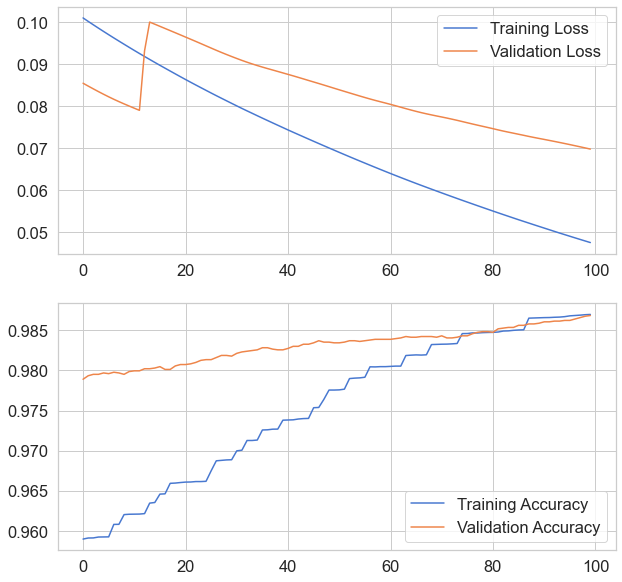

In [127]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].legend()
axs[1].plot(train_accs, label='Training Accuracy')
axs[1].plot(val_accs, label='Validation Accuracy')
axs[1].legend()
plt.show()


# **Observations/Reasoning**

In this project, we had to detect credit card fraud  through neural network using PyTorch. We explored the dataset and visualied it and performed some data processiing as the data was imbalance.

Training and Testing was done. Binary-cross entropy loss function and Adam optimizer was used to train the data. Also each epoch was observed for training and testing losses and accuracy.

Implementing credit card fraud classifier using neural network in PyTorch we got testing accuracy of almost 98% which is a very good performance. However the data was small so for larger data the performance would change according to me.

